In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from shapely.geometry import Polygon, mapping

In [2]:
df = pd.read_csv("../data/large/statliga-vagar-2m-leq-i-staden0.csv", sep=";")

In [3]:
ashape = df.iloc[1,]["Geo Shape"]
ashape


'{"type": "Polygon", "coordinates": [[[12.703224078938154, 56.02824784794463], [12.703231214856409, 56.02825720169836], [12.7032428641653, 56.0282596346108], [12.703257083628683, 56.02825596493249], [12.703261969482371, 56.02824809264671], [12.703260572336983, 56.028242333581396], [12.703256446225005, 56.02823637007434], [12.703250455079726, 56.02823178937052], [12.703243475901184, 56.028229933600706], [12.703236623305015, 56.02823158867086], [12.703230365106727, 56.02823600224681], [12.703225867168419, 56.028241861557774], [12.703224078938154, 56.02824784794463]]]}'

In [6]:
shape_dict = json.loads(ashape)
shape_dict

{'coordinates': [[[12.703224078938154, 56.02824784794463],
   [12.703231214856409, 56.02825720169836],
   [12.7032428641653, 56.0282596346108],
   [12.703257083628683, 56.02825596493249],
   [12.703261969482371, 56.02824809264671],
   [12.703260572336983, 56.028242333581396],
   [12.703256446225005, 56.02823637007434],
   [12.703250455079726, 56.02823178937052],
   [12.703243475901184, 56.028229933600706],
   [12.703236623305015, 56.02823158867086],
   [12.703230365106727, 56.02823600224681],
   [12.703225867168419, 56.028241861557774],
   [12.703224078938154, 56.02824784794463]]],
 'type': 'Polygon'}

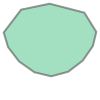

In [8]:
pol = Polygon(shape_dict['coordinates'][0])
pol

In [15]:
pol.centroid.coords.xy

(array('d', [12.703243170461166]), array('d', [56.02824532831605]))

In [25]:
pol.centroid.coords.xy[0][0]

12.703243170461166

In [26]:
pol.centroid.coords.xy[1][0]

56.02824532831605

In [19]:
df.iloc[1,]['ISOVALUE']

35.0

In [20]:
df.columns

Index(['Geo Point', 'Geo Shape', 'ISOVALUE', 'Shape_Leng', 'Shape_Area'], dtype='object')

In [21]:
df.iloc[1,]['Shape_Area']

5.6144266183500005

In [44]:
def get_feature_list(row):

#     print(row)
#     print(row["Geo Shape"])
    
    try:
        shape_str = row["Geo Shape"]
        shape_dict = json.loads(shape_str)
        shape_pol = Polygon(shape_dict['coordinates'][0])
        centroid_coords = shape_pol.centroid.coords
    except:
        print("Failing row: ", row)
        return
    
    lat = centroid_coords.xy[0][0]
    lng = centroid_coords.xy[1][0]
    iso = row['ISOVALUE']
    area = row['Shape_Area']
#     print(lat, lng, iso, area)
    return [lat, lng, iso, area]
    
get_feature_list(df.iloc[1,])

[12.703243170461166, 56.02824532831605, 35.0, 5.6144266183500005]

In [45]:
out_df = df.apply(get_feature_list, 1)

Failing row:  Geo Point                          56.0049498447, 12.7074472734
Geo Shape     {"type": "MultiPolygon", "coordinates": [[[[12...
ISOVALUE                                                     35
Shape_Leng                                              95.8104
Shape_Area                                              273.842
Name: 302, dtype: object
Failing row:  Geo Point                          56.0377748612, 12.7371401416
Geo Shape     {"type": "MultiPolygon", "coordinates": [[[[12...
ISOVALUE                                                     35
Shape_Leng                                               235026
Shape_Area                                          2.50063e+07
Name: 577, dtype: object
Failing row:  Geo Point                          56.0230432769, 12.7019201594
Geo Shape     {"type": "MultiPolygon", "coordinates": [[[[12...
ISOVALUE                                                     40
Shape_Leng                                              701.395
Shape_Area  

In [51]:
list(out_df)

[[12.709821674390842, 56.028077082320685, 35.0, 1.11779866875],
 [12.703243170461166, 56.02824532831605, 35.0, 5.6144266183500005],
 [12.697144176324588, 56.028436757528915, 35.0, 11.085651573599998],
 [12.692557752937654, 56.02921457322966, 35.0, 0.04030649994],
 [12.69605134721586, 56.03027015607615, 35.0, 1.34587014651],
 [12.699606226685564, 56.03082209071852, 35.0, 53.44703279],
 [12.697646482603016, 56.03123536131194, 35.0, 628.735722162],
 [12.693615714018266, 56.03226069739711, 35.0, 43572.5849025],
 [12.700840467343404, 56.03206081303116, 35.0, 0.87636862552],
 [12.74068624394402, 56.03364404481097, 35.0, 155.97169066],
 [12.693813168013696, 56.03443351297943, 35.0, 0.34539999996],
 [12.691466083490813, 56.035440474185094, 35.0, 294.084953494],
 [12.692021785194688, 56.03569543245245, 35.0, 3.99781591823],
 [12.728353625706589, 56.03588810100118, 35.0, 57.6475218636],
 [12.690689302000479, 56.03795895120931, 35.0, 0.08549099997000001],
 [12.717550090677575, 56.03829336836918, 

In [54]:
out_df
json_out = json.dumps(list(out_df))
with open('../data/centroided_noise.json', 'w') as out_fh:
    json.dump(list(out_df), out_fh)
